# Phân tích về đái tháo đường

## 1. Tổng quan về file csv
+ **Tổng quát:**
Hồ sơ bệnh nhân tiểu đường được thu thập từ hai nguồn, một thiết bị ghi điện tử tự động và hồ sơ giấy. 
    + Thiết bị tự động có đồng hồ bên trong để đánh dấu thời gian các sự kiện, trong khi hồ sơ giấy chỉ cung cấp các khoảng ‘thời gian logic’ (bữa sáng, bữa trưa, bữa tối, trước khi đi ngủ). 
    + Đối với hồ sơ giấy, thời gian cố định được gán cho các mốc: bữa sáng (08:00), bữa trưa (12:00), bữa tối (18:00) và trước khi đi ngủ (22:00). Do đó, hồ sơ giấy có các thời điểm ghi giả định đồng nhất, trong khi hồ sơ điện tử có dấu thời gian thực tế hơn

+ **Dữ liệu đầu vào:**
    + Number of times pregnant (số lần mang thai)
    + Plasma glucose concentration a 2 hours in an oral glucose tolerance test (Nồng độ glucose huyết tương sau 2 giờ trong nghiệm pháp dung nạp glucose bằng đường uống)
    + Diastolic blood pressure (mm Hg) (Huyết áp tâm trương)
    + Triceps skin fold thickness (mm) (Độ dày nếp gấp da cơ tam đầu hay cơ vùng mặt sau cánh tay)
    + 2-Hour serum insulin (mu U/ml) (huyết thanh insulin 2 giờ)
    + Body mass index (weight in kg/(height in m)^2) (chỉ số cơ thể)
    + Diabetes pedigree function (bệnh truyền từ gia đình)
    + Age (years) (tuổi)
+ **Kết quả:**
    + Class variable (0 or 1) (Lớp, phân biệt có bị bệnh hay không)

In [304]:
from PIL import Image
import matplotlib.pyplot as plt

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1 Khai báo thư viện

In [305]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib
from IPython.display import display 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

### 2.2. Nạp dữ liệu (Load Dataset)

In [306]:
data_names = [    "pregnancies",        # Number of times pregnant
    "glucose",            # Plasma glucose concentration (2h OGTT)
    "blood_pressure",     # Diastolic blood pressure (mm Hg)
    "skin_thickness",     # Triceps skin fold thickness (mm)
    "insulin",            # 2-Hour serum insulin (mu U/ml)
    "bmi",                # Body mass index
    "diabetes_pedigree",  # Diabetes pedigree function
    "age",                # Age (years)
    "Class" ]
df_dataset = pd.read_csv(r"pima-indians-diabetes.csv", names = data_names)

## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)

#### 1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [307]:
# shape
print(f'+ Shape: {df_dataset.shape}')
# types
print(f'+ Data Types: \n{df_dataset.dtypes}')
# head, tail
print(f'+ Contents: ')
display(df_dataset.head(5))
display(df_dataset.tail(5))
# info
df_dataset.info()

+ Shape: (768, 9)
+ Data Types: 
pregnancies            int64
glucose                int64
blood_pressure         int64
skin_thickness         int64
insulin                int64
bmi                  float64
diabetes_pedigree    float64
age                    int64
Class                  int64
dtype: object
+ Contents: 


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,Class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        768 non-null    int64  
 1   glucose            768 non-null    int64  
 2   blood_pressure     768 non-null    int64  
 3   skin_thickness     768 non-null    int64  
 4   insulin            768 non-null    int64  
 5   bmi                768 non-null    float64
 6   diabetes_pedigree  768 non-null    float64
 7   age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Nhận xét:**
* Dữ liệu có 8 cột để phân lớp: pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age
* Giá trị của 8 tính chất phân là khác nhau, đôi khi không có.
* Có tổng là 768 dòng 
* Dữ liệu phân lớp: Class

#### 2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [308]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
n_duplicated = df_dataset.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated > 0:
    display.display(df_dataset[df_dataset.duplicated()])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0


**Nhận xét**:
+ Dữ liệu không có giá trị rỗng (NaN, Null)

#### 3) **Xóa các dữ liệu có 0 ở các cột không hợp lệ, thay bằng NaN**

In [309]:
cols_with_zeros = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']

print("--- Số lượng giá trị 0 trong các cột đáng ngờ (trước khi xử lý) ---")
print((df_dataset[cols_with_zeros] == 0).sum())


# Thay thế các giá trị 0 này bằng NaN (Not a Number) để biểu thị chính xác là dữ liệu bị thiếu
df_dataset[cols_with_zeros] = df_dataset[cols_with_zeros].replace(0, np.nan)

print("--- Số lượng giá trị thiếu (NaN) sau khi thay thế 0 ---")
print(df_dataset.isnull().sum())

--- Số lượng giá trị 0 trong các cột đáng ngờ (trước khi xử lý) ---
glucose             5
blood_pressure     35
skin_thickness    227
insulin           374
bmi                11
dtype: int64
--- Số lượng giá trị thiếu (NaN) sau khi thay thế 0 ---
pregnancies            0
glucose                5
blood_pressure        35
skin_thickness       227
insulin              374
bmi                   11
diabetes_pedigree      0
age                    0
Class                  0
dtype: int64


In [310]:
# for col in cols_with_zeros:
#     median_val = df_dataset[col].median()
#     df_dataset[col].fillna(median_val, inplace=True)
# print(df_dataset.isnull().sum())
df_dataset.dropna(subset=["glucose", "blood_pressure","skin_thickness","insulin","bmi"])


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,Class
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


**Nhận xét**
+ Các cột có số lượng giá trị 0 là: glucoso, blood_pressure, skin_thickness, insulin,bmi.
+ Các giá trị 0 đã được thay đổi bằng giá trị Nan.
+ Loại bỏ các giá trị Nan, số lượng dòng còn lại là 392.

#### 4) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [311]:
description = df_dataset.describe().T
display(description)


,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
blood_pressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
skin_thickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
bmi,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
diabetes_pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### 5) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [312]:
print("-- Data trước khi đã loại bỏ NaN --")
df_dataset["Class"].value_counts()

-- Data trước khi đã loại bỏ NaN --


Class
0    500
1    268
Name: count, dtype: int64

**Nhận xét**:
+ Dữ liệu cần phân loại 2 loại là có hay không bị đái tháo đường
+ Không bị là 500 và bị đái tháo đường là 268 

#### 6) **Mối tương quan giữa các tính chất (Correlations)**

Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.

Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả. 

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$

Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn. 

Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,Class
pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
blood_pressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
skin_thickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
bmi,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
diabetes_pedigree,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Class,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


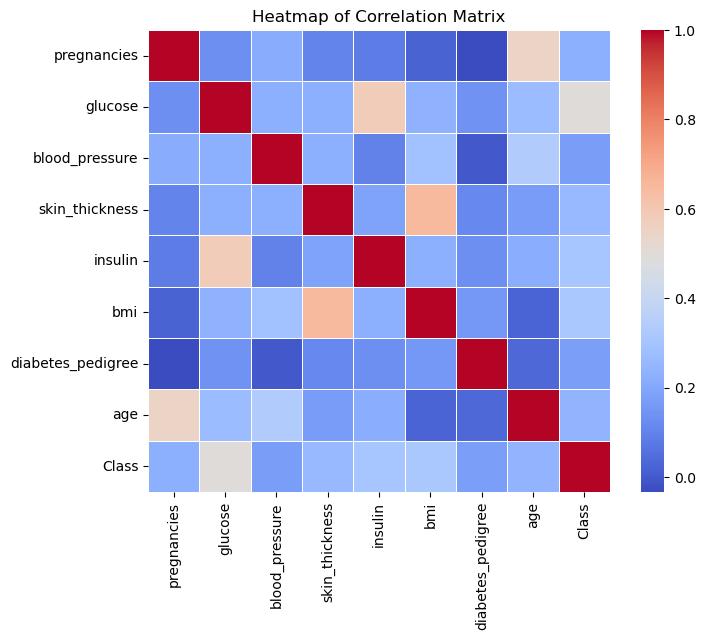

In [313]:
correlations = df_dataset.corr(method='pearson')
display(correlations)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, cmap='coolwarm', cbar=True, square=True, linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

+ Cặp tính chất có tính tương đồng cao là:
    + age-pregnancies = 0.544341
    + bmi-skinthickness = 0.648214
    + glucoso-insulin = 0.581186	

### 3.2. Hiển thị dữ liệu (Visualize Data)

#### 1) Hiển thị trên từng tính chất đơn (Univariate Plots)

**Box and whisker plots**
+ https://www.simplypsychology.org/boxplots.html
+ So sánh các trung vị (median) tương ứng của mỗi ô hộp (box plot). Nếu đường trung vị của một ô hộp nằm bên ngoài ô của một ô hộp so sánh, thì có thể có sự khác biệt giữa hai nhóm.
+ So sánh chiều dài hộp để kiểm tra cách dữ liệu được phân tán giữa mỗi mẫu. Hộp càng dài thì dữ liệu càng phân tán. Dữ liệu càng nhỏ càng ít bị phân tán.
+ Một ngoại lệ (outlier) được định nghĩa là một điểm dữ liệu nằm bên ngoài phần rìa (whiskers) của ô hộp.
+ Kiểm tra hướng lệch của dữ liệu (cân đối, các phần tử tập trung trái, phải).
    + Median ở giữa hộp và râu (whiskers) ở hai bên như nhau thì phân bố là đối xứng.
    + Median ở gần đáy hộp hơn và nếu râu ngắn hơn ở đầu dưới của hộp, thì phân phối là lệch dương (lệch phải).
    + Median ở gần đầu hộp hơn và nếu râu ngắn hơn ở đầu trên của hộp, thì phân bố bị lệch âm (lệch trái).

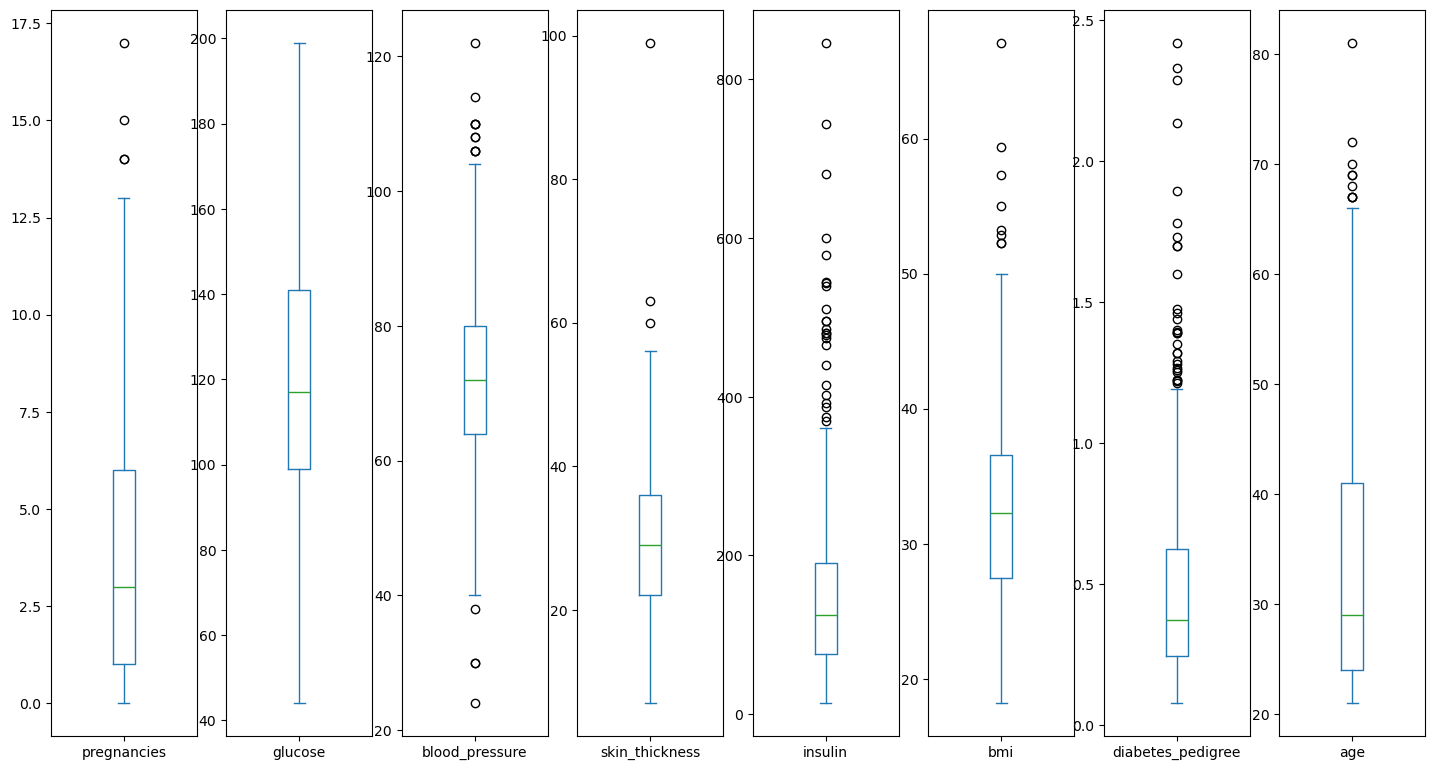

In [314]:
df_dataset.drop('Class', axis=1).plot(kind="box", subplots=True, layout=(9,9), sharex=False, sharey=False, figsize=(20,100));

**Nhận xét**:
+ Độ trải rộng giữa các tính chất khá khác nhau
+ Các biến có đơn vị và thang đo rất khác nhau, cho thấy cần phải chuẩn hóa dữ liệu.
+ Hầu hết các cột đều có giá trị ngoại lai (các chấm tròn), đặc biệt là insulin, diabetes_pedigree, và age.
+ Thang đo rất khác nhau: Mỗi biến có một thang đo (trục y) riêng, chênh lệch rất lớn (ví dụ insulin so với diabetes_pedigree).

+ Nhiều giá trị ngoại lai: Các chấm tròn cho thấy sự tồn tại của các giá trị bất thường ở hầu hết các biến.

**Biểu đồ Histogram**

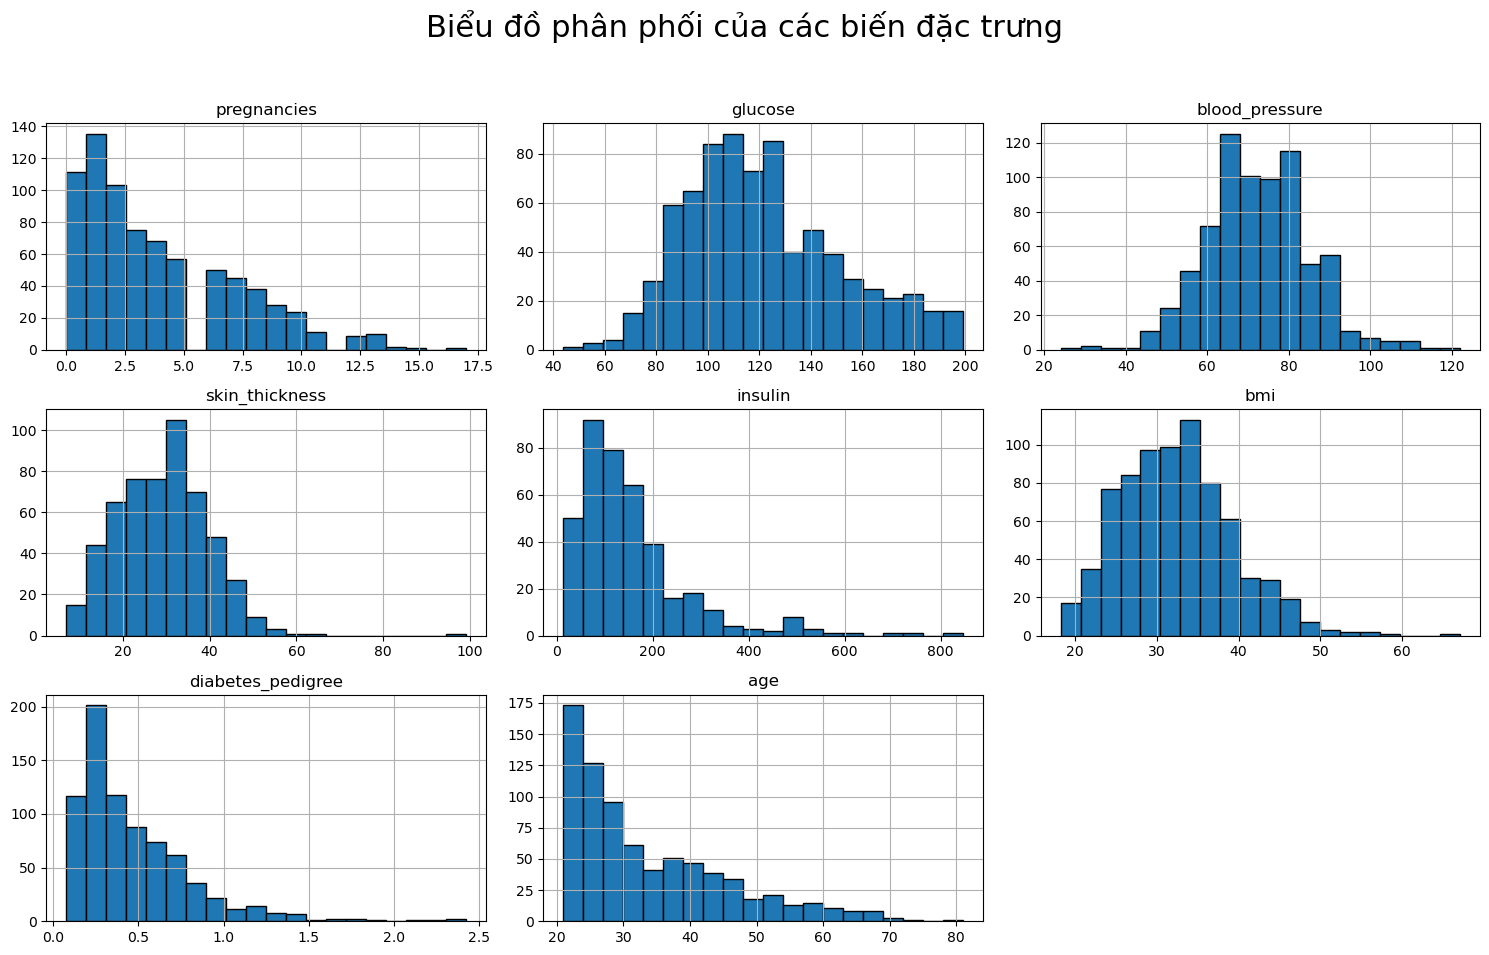

In [315]:

df_dataset.drop('Class', axis=1).hist(figsize=(15, 10), bins=20, sharex=False,  sharey=False, edgecolor='black')
plt.suptitle("Biểu đồ phân phối của các biến đặc trưng", size=22)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

**Nhận xét**
+ Chỉ có 2 cột là: glucose và blood_pressure là 2 cột có biểu đồ histogram có dạng phân phối chuẩn.
+ Các cột còn lại đều phân phối lệch trái.

#### 2) Hiển thị nhiều tính chất (Multivariate Plots)

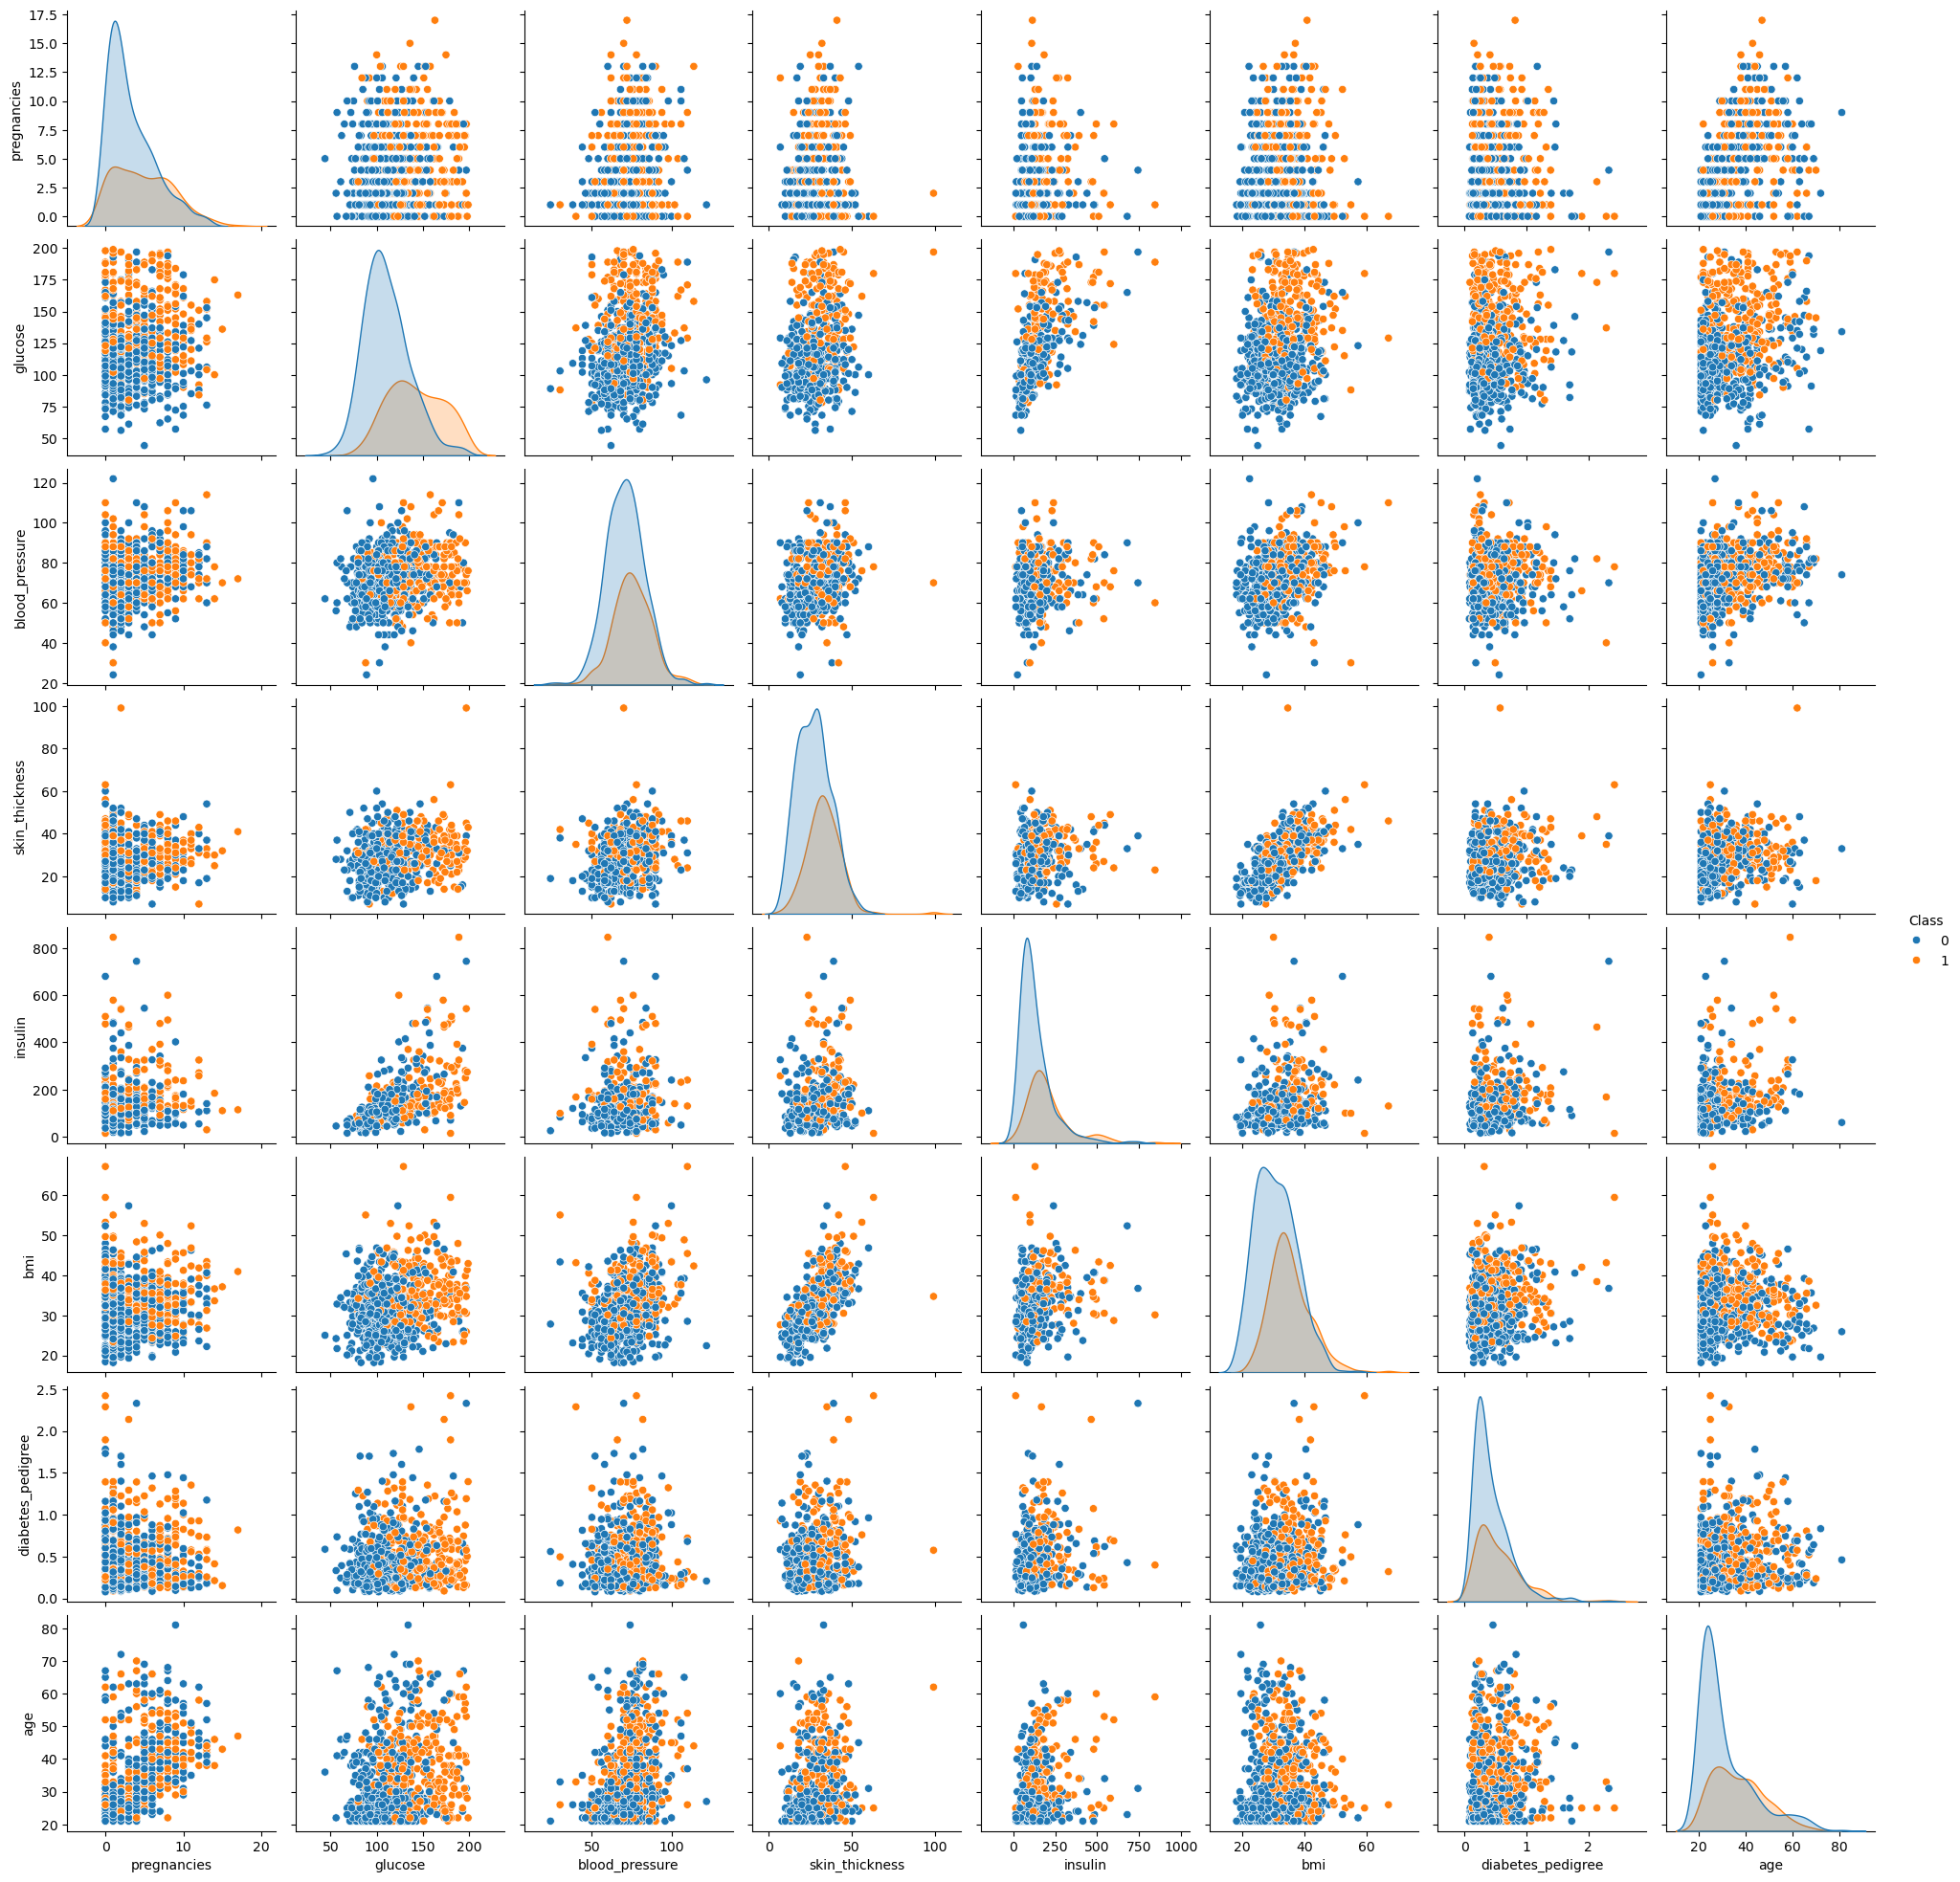

In [316]:
sns.pairplot(df_dataset, hue='Class', diag_kind='kde')

# Hiển thị biểu đồ
plt.show()

**Nhận xét**
+ Trục chéo chính:
    + Trên đường chéo là biểu đồ phân phối của từng biến riêng lẻ.
    + glucose: thấy có phân phối lệch phải (skewed) → có người có chỉ số glucose rất cao.
    + age: phân bố gần chuẩn, tập trung nhiều ở khoảng 20–40 tuổi.
    + bmi: phân bố lệch nhẹ, nhiều người có BMI trong khoảng 20–40.
+ Ngoài đường chéo:
    + Là biểu đồ phân tán thể hiện mối quan hệ giữa hai biến.
    + glucose và insulin: có tương quan dương (glucose càng cao thì insulin có xu hướng cao).
    + age và pregnancies: cũng có xu hướng dương (người lớn tuổi có khả năng mang thai nhiều lần hơn).
    + bmi và skin_thickness: có quan hệ dương rõ ràng.

## 4. Chuẩn bị dữ liệu (Prepare Data)

### 4.1. Làm sạch dữ liệu (Data Cleaning)

#### 1) **Tạo bảng dữ liệu làm sạch**
+ Chỉ giữ lại các cột Input, Ouput

In [317]:
df_clean = df_dataset.copy()

#### 2) **Xóa dữ liệu trùng nhau**

In [318]:
display(df_clean[df_clean.duplicated()])

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,Class


#### 3) **Xóa các dữ liệu có 0 ở các cột không hợp lệ, thay bằng NaN**

In [319]:
cols_with_zeros = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']

print("--- Số lượng giá trị 0 trong các cột đáng ngờ (trước khi xử lý) ---")
print((df_clean[cols_with_zeros] == 0).sum())


# Thay thế các giá trị 0 này bằng NaN (Not a Number) để biểu thị chính xác là dữ liệu bị thiếu
df_clean[cols_with_zeros] = df_clean[cols_with_zeros].replace(0, np.nan)

print("--- Số lượng giá trị thiếu (NaN) sau khi thay thế 0 ---")
print(df_clean.isnull().sum())

--- Số lượng giá trị 0 trong các cột đáng ngờ (trước khi xử lý) ---
glucose           0
blood_pressure    0
skin_thickness    0
insulin           0
bmi               0
dtype: int64
--- Số lượng giá trị thiếu (NaN) sau khi thay thế 0 ---
pregnancies            0
glucose                5
blood_pressure        35
skin_thickness       227
insulin              374
bmi                   11
diabetes_pedigree      0
age                    0
Class                  0
dtype: int64


In [320]:
for col in cols_with_zeros:
    median_val = df_clean[col].median()
    df_clean[col].fillna(median_val, inplace=True)

print("--- Đã điền xong các giá trị thiếu bằng trung vị. Kiểm tra lại: ---")
print(df_clean.isnull().sum())
#df_clean=df_clean.dropna(subset=["glucose", "blood_pressure","skin_thickness","insulin","bmi"])

--- Đã điền xong các giá trị thiếu bằng trung vị. Kiểm tra lại: ---
pregnancies          0
glucose              0
blood_pressure       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
age                  0
Class                0
dtype: int64


### 4.2. Biến đổi dữ liệu (Data Transforms)

#### 1) Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

In [321]:
# Min-Max Normalization
scale_columns = ["pregnancies",        # Number of times pregnant
    "glucose",            # Plasma glucose concentration (2h OGTT)
    "blood_pressure",     # Diastolic blood pressure (mm Hg)
    "skin_thickness",     # Triceps skin fold thickness (mm)
    "insulin",            # 2-Hour serum insulin (mu U/ml)
    "bmi",                # Body mass index
    "diabetes_pedigree",  # Diabetes pedigree function
    "age",                # Age (years)
    ]
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_clean[scale_columns])
df_clean_minmax = df_clean.copy()
df_clean_minmax[scale_columns] = minmax_scaler.transform(df_clean[scale_columns])
df_clean_minmax

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,Class
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0
764,0.117647,0.503226,0.469388,0.217391,0.133413,0.380368,0.111870,0.100000,0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0
766,0.058824,0.529032,0.367347,0.239130,0.133413,0.243354,0.115713,0.433333,1


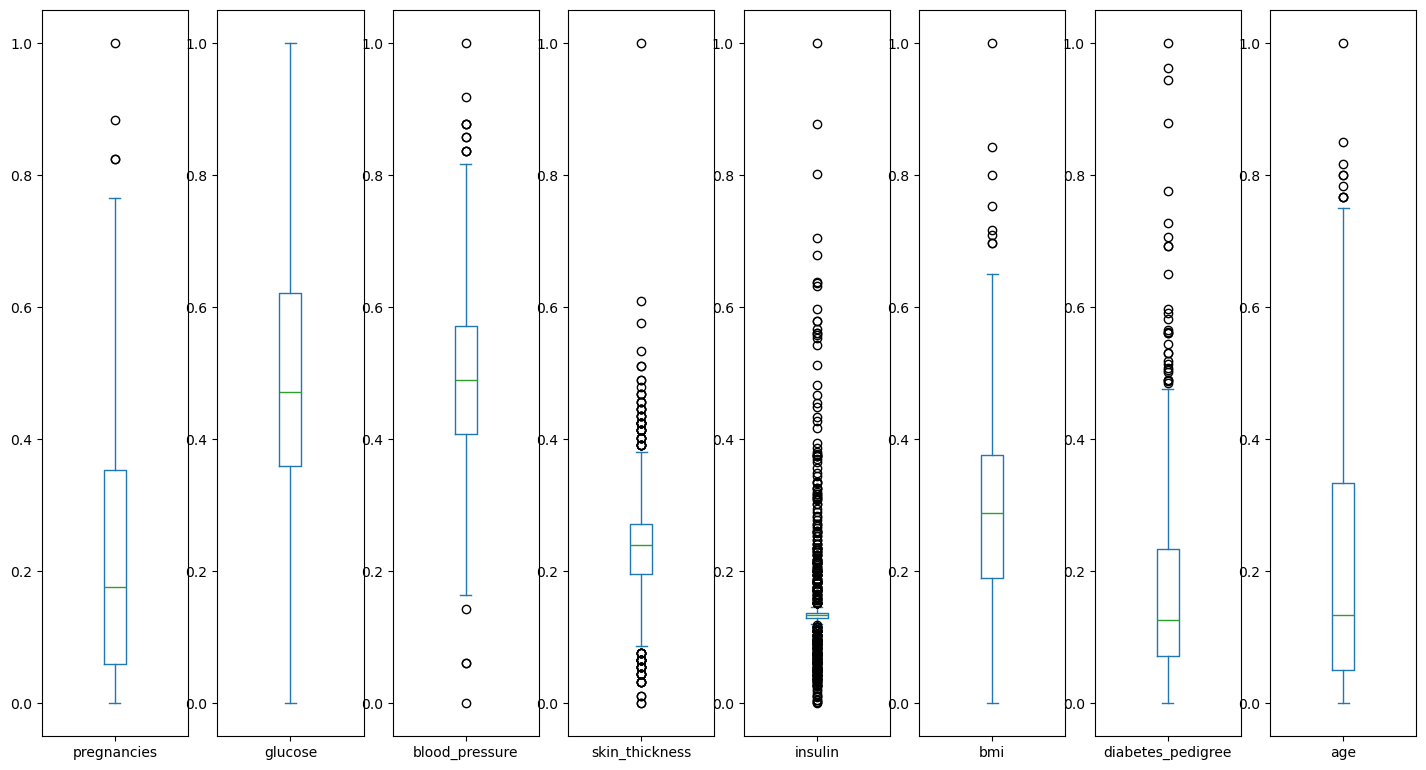

In [322]:
df_clean_minmax[scale_columns].plot(kind="box", subplots=True, layout=(9,9), sharex=False, sharey=False, figsize=(20,100));

In [323]:
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])
df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,Class
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.150354,0.455573,0.064737,-0.908682,2.532136,0
764,-0.547919,0.011301,-0.197433,-0.239949,-0.181541,0.632365,-0.398282,-0.531023,0
765,0.342981,-0.021574,-0.031990,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760,0
766,-0.844885,0.142800,-1.024647,-0.012301,-0.181541,-0.342790,-0.371101,1.170732,1


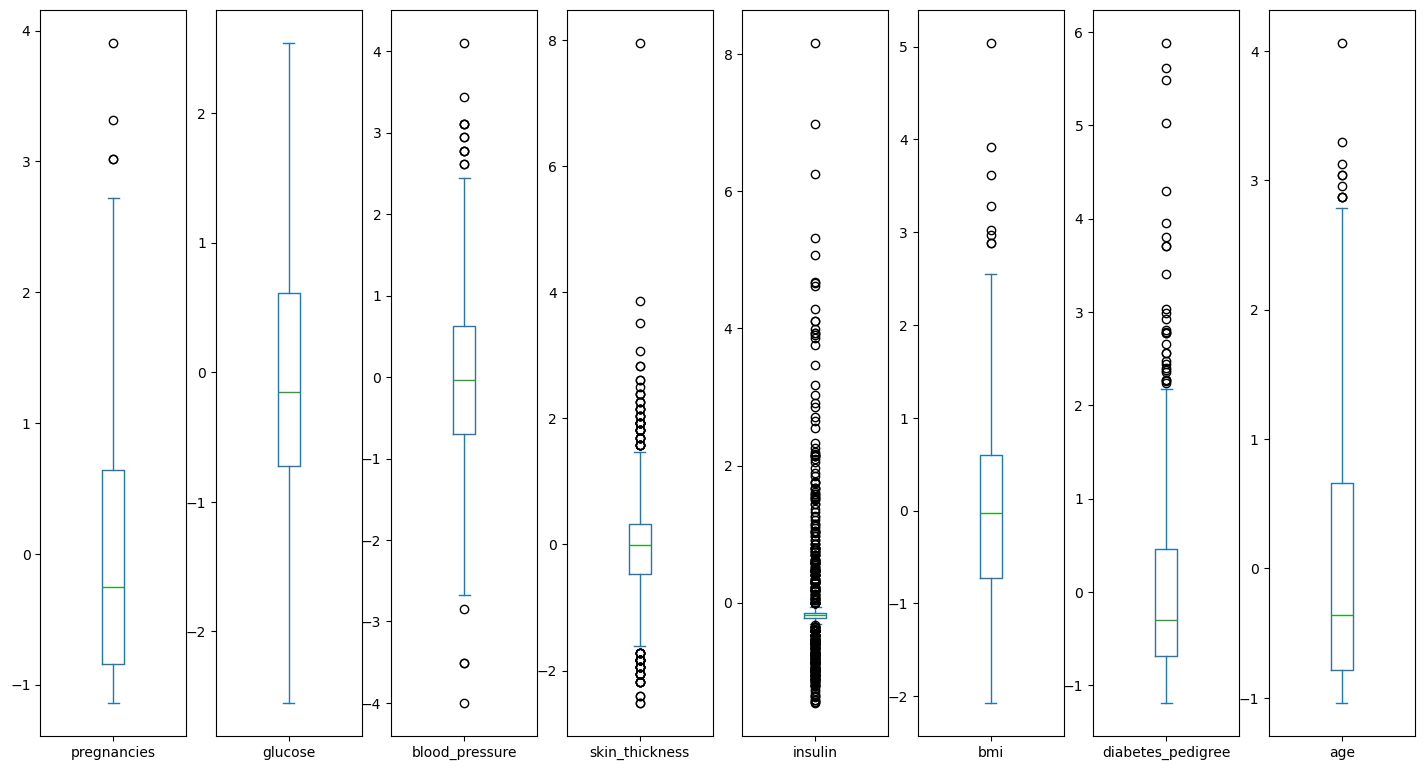

In [324]:
df_clean_standard[scale_columns].plot(kind="box", subplots=True, layout=(9,9), sharex=False, sharey=False, figsize=(20,100));

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,Class
pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
blood_pressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
skin_thickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
bmi,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
diabetes_pedigree,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Class,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


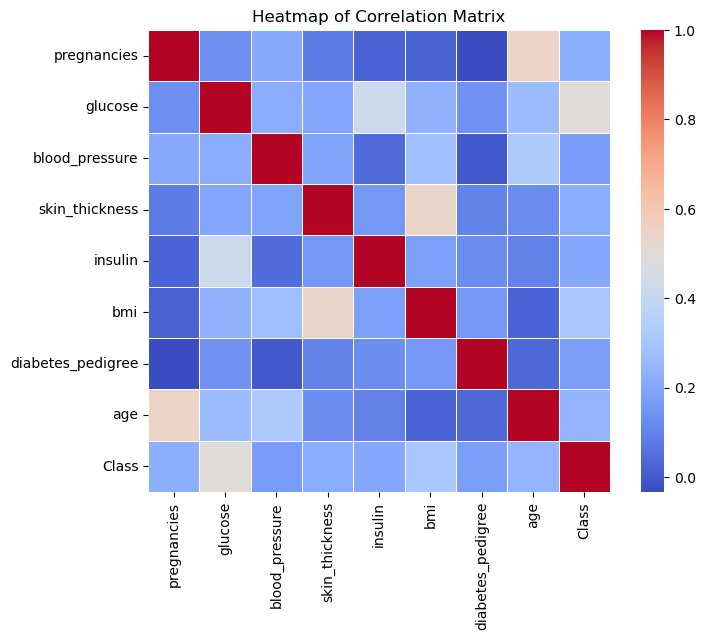

In [325]:
correlations = df_clean_standard.corr(method='pearson')
display(correlations)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, cmap='coolwarm', cbar=True, square=True, linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

#### 2) Chia dữ liệu thực nghiệm

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Chia dữ liệu thành tập train/test (tỷ lệ 70/30)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [326]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:, -1]
X_data.shape, y_data.shape
print(X_data[:20, :])
print(y_data[:20])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 1.250e+02 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 1.250e+02 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 2.900e+01 1.250e+02 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]
 [5.000e+00 1.160e+02 7.400e+01 2.900e+01 1.250e+02 2.560e+01 2.010e-01
  3.000e+01]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01]
 [1.000e+01 1.150e+02 7.200e+01 2.900e+01 1.250e+02 3.530e+01 1.340e-01
  2.900e+01]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01]
 [8.000e+00 1.250e+02 9.600e+01 2.900e+01 1.250e+02 3.230e+01 2.320e-01
  5.400e+01]
 [4.000e+00 1.100e+02 9.200e+01 2.900e+01 1.250e+02 3.760e+01 1.910e-01
  3.000e+01]
 [1.000e+01 1.680e+02 7.400e+01 2.900e+01 1.250e+02 3.800e+01 5.3

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7)
print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data)}')
print(f'+ Train: shape={X_train.shape}\nInput = \n{X_train[:5]}\nOutput = {y_train[:5]}')
print(f'+ Test: shape={X_test.shape}\nInput = \n{X_test[:5]}\nOutput = {y_test[:5]}')

+ Train/Test: Train Ratio = 0.69921875
+ Train: shape=(537, 8)
Input = 
[[  4.    110.     66.     29.    125.     31.9     0.471  29.   ]
 [  7.    150.     66.     42.    342.     34.7     0.718  42.   ]
 [  1.    115.     70.     30.     96.     34.6     0.529  32.   ]
 [  0.    173.     78.     32.    265.     46.5     1.159  58.   ]
 [  4.    189.    110.     31.    125.     28.5     0.68   37.   ]]
Output = [0. 0. 1. 0. 0.]
+ Test: shape=(231, 8)
Input = 
[[4.00e+00 1.54e+02 6.20e+01 3.10e+01 2.84e+02 3.28e+01 2.37e-01 2.30e+01]
 [1.00e+00 1.17e+02 8.80e+01 2.40e+01 1.45e+02 3.45e+01 4.03e-01 4.00e+01]
 [0.00e+00 1.01e+02 6.20e+01 2.90e+01 1.25e+02 2.19e+01 3.36e-01 2.50e+01]
 [1.00e+00 1.24e+02 7.40e+01 3.60e+01 1.25e+02 2.78e+01 1.00e-01 3.00e+01]
 [0.00e+00 9.80e+01 8.20e+01 1.50e+01 8.40e+01 2.52e+01 2.99e-01 2.20e+01]]
Output = [0. 1. 0. 0. 0.]


In [328]:
# Lưu thông tin
save_dir = "exps/diabetes"
if os.path.exists(save_dir) == False: os.makedirs(save_dir)

# Save training data
np.savez(f'{save_dir}/data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
# Save cleaning data
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)

os.listdir(save_dir)

['data.npz', 'df_clean.xlsx']

In [329]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np

# 1. Tải file .npz
data = np.load(r"C:\Users\kimho\OneDrive\Desktop\Project\Data Mining\GIt_pull\demo\lab02\exps\diabetes\data.npz")

# 2. Truy cập vào từng mảng dữ liệu bằng tên của chúng
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

# 3. Kiểm tra và sử dụng dữ liệu
# In ra hình dạng (shape) của mỗi mảng để xác nhận
print(f"Hình dạng của X_train: {X_train.shape}")
print(f"Hình dạng của y_train: {y_train.shape}")
print(f"Hình dạng của X_test: {X_test.shape}")
print(f"Hình dạng của y_test: {y_test.shape}")

# In ra 5 dòng đầu của tập huấn luyện để xem qua
print("\n--- 5 dòng đầu của X_train ---")
print(X_train[:5])

print("\n--- 5 giá trị đầu của y_train ---")
print(y_train[:5])

Hình dạng của X_train: (537, 8)
Hình dạng của y_train: (537,)
Hình dạng của X_test: (231, 8)
Hình dạng của y_test: (231,)

--- 5 dòng đầu của X_train ---
[[  4.    110.     66.     29.    125.     31.9     0.471  29.   ]
 [  7.    150.     66.     42.    342.     34.7     0.718  42.   ]
 [  1.    115.     70.     30.     96.     34.6     0.529  32.   ]
 [  0.    173.     78.     32.    265.     46.5     1.159  58.   ]
 [  4.    189.    110.     31.    125.     28.5     0.68   37.   ]]

--- 5 giá trị đầu của y_train ---
[0. 0. 1. 0. 0.]


In [330]:
# 2. Huấn luyện một mô hình máy học (ví dụ: Hồi quy Logistic)
model = LogisticRegression(max_iter=1000) # Tăng max_iter để đảm bảo mô hình hội tụ
model.fit(X_train, y_train)

# 3. Tạo ra các dự đoán trên tập kiểm tra

y_pred = model.predict(X_test)

# 4. Tạo một DataFrame để so sánh và phân tích kết quả
# Lấy tên các cột đặc trưng (giả sử theo thứ tự chuẩn)
feature_names = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'age']

# Tạo DataFrame từ dữ liệu kiểm tra
df_results = pd.DataFrame(X_test, columns=feature_names)
df_results['Actual_Class'] = y_test
df_results['Predicted_Class'] = y_pred

# Thêm một cột để xác định dự đoán là Đúng hay Sai
df_results['Status'] = np.where(df_results['Actual_Class'] == df_results['Predicted_Class'], 'Đúng', 'Sai')

# 5. Hiển thị các dự đoán SAI để phân tích lỗi
print("--- CÁC TRƯỜNG HỢP MÔ HÌNH DỰ ĐOÁN SAI ---")
display(df_results[df_results['Status'] == 'Sai'])

print("\n--- CÁC TRƯỜNG HỢP MÔ HÌNH DỰ ĐOÁN ĐÚNG ---")
display(df_results[df_results['Status'] == 'Đúng'])

--- CÁC TRƯỜNG HỢP MÔ HÌNH DỰ ĐOÁN SAI ---


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,Actual_Class,Predicted_Class,Status
1,1.0,117.0,88.0,24.0,145.0,34.5,0.403,40.0,1.0,0.0,Sai
17,6.0,125.0,76.0,29.0,125.0,33.8,0.121,54.0,1.0,0.0,Sai
22,3.0,80.0,82.0,31.0,70.0,34.2,1.292,27.0,1.0,0.0,Sai
23,4.0,109.0,64.0,44.0,99.0,34.8,0.905,26.0,1.0,0.0,Sai
26,10.0,129.0,76.0,28.0,122.0,35.9,0.280,39.0,0.0,1.0,Sai
29,5.0,143.0,78.0,29.0,125.0,45.0,0.190,47.0,0.0,1.0,Sai
32,1.0,95.0,82.0,25.0,180.0,35.0,0.233,43.0,1.0,0.0,Sai
36,3.0,112.0,74.0,30.0,125.0,31.6,0.197,25.0,1.0,0.0,Sai
39,2.0,134.0,70.0,29.0,125.0,28.9,0.542,23.0,1.0,0.0,Sai
40,7.0,125.0,86.0,29.0,125.0,37.6,0.304,51.0,0.0,1.0,Sai



--- CÁC TRƯỜNG HỢP MÔ HÌNH DỰ ĐOÁN ĐÚNG ---


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,Actual_Class,Predicted_Class,Status
0,4.0,154.0,62.0,31.0,284.0,32.8,0.237,23.0,0.0,0.0,Đúng
2,0.0,101.0,62.0,29.0,125.0,21.9,0.336,25.0,0.0,0.0,Đúng
3,1.0,124.0,74.0,36.0,125.0,27.8,0.100,30.0,0.0,0.0,Đúng
4,0.0,98.0,82.0,15.0,84.0,25.2,0.299,22.0,0.0,0.0,Đúng
5,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,1.0,Đúng
...,...,...,...,...,...,...,...,...,...,...,...
223,1.0,90.0,62.0,12.0,43.0,27.2,0.580,24.0,0.0,0.0,Đúng
224,0.0,138.0,72.0,29.0,125.0,36.3,0.933,25.0,1.0,1.0,Đúng
225,2.0,71.0,70.0,27.0,125.0,28.0,0.586,22.0,0.0,0.0,Đúng
226,4.0,131.0,68.0,21.0,166.0,33.1,0.160,28.0,0.0,0.0,Đúng


# Kết thúc